In [1]:
import os
os.add_dll_directory('C:\\Program Files\\IBM\\SQLLIB\\BIN')
# conectar a la base de datos IBM Db2
import ibm_db

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from queries import get_gpa_novatos

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
list_names_files = glob.glob("data/materias/all_*")
df_complete = pd.DataFrame()

In [6]:
df_materias = pd.read_csv("data/materias/dificultad_materia.csv")

In [7]:
for file in list_names_files:
    print("file", file)
    split_file = file.split("_")
    termino = split_file[2].split(".")[0]
    if termino == "3S":
        continue
    
    df = pd.read_csv(file)

    df["anio"] = split_file[1]
    df["termino"] = termino
    if not("MATERIA" in df.keys()):
        df = pd.merge(df, df_materias[["CODIGOMATERIA", "MATERIA"]], left_on="COD_MATERIA_ACAD_MO", right_on="CODIGOMATERIA")

    df_complete = pd.concat([df_complete, df], ignore_index=True)

file data/materias\all_2020_1S.csv
file data/materias\all_2020_2S.csv
file data/materias\all_2021_1S.csv
file data/materias\all_2021_2S.csv
file data/materias\all_2022_1S.csv
file data/materias\all_2022_2S.csv
file data/materias\all_2023_1S.csv
file data/materias\all_2023_2S.csv
file data/materias\all_2024_1S.csv
file data/materias\all_2024_2S.csv
file data/materias\all_2025_1S.csv
file data/materias\all_2025_2S.csv


#### Estadistica

In [8]:
df_complete.shape

(368470, 29)

In [9]:
df_complete["COD_ESTUDIANTE"] = df_complete["COD_ESTUDIANTE"].astype(str)
# change type of df_complete["anio"] to int
df_complete["anio"] = df_complete["anio"].astype(int)
df_complete["termino"] = df_complete["termino"].astype("category")

In [10]:
df_complete.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",17.0,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S
2,201313869,ACUG1035,AP,1,86,89,"8,75","7,90",59.0,56.0,67.0,"6,97",50.0,"7,45",13.0,S,"4,27","4,30","4,80",0,1,1,0,1,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S
3,201507649,ACUG1035,AP,1,83,93,"8,80","7,90",49.0,65.0,74.0,"7,73",47.0,"7,93",11.0,N,"3,01",NaN,NaN,0,0,2,2,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S
4,201607884,ACUG1035,AP,1,95,95,"9,50","7,90",39.0,72.0,77.0,"8,02",39.0,"8,02",8.0,N,NaN,NaN,NaN,0,1,1,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S


In [11]:
# texto en la columna COD_MATERIA_ACAD_MO
df_complete[df_complete["COD_MATERIA_ACAD_MO"].str.contains("ADM")]["COD_MATERIA_ACAD_MO"].shape

(19741,)

In [12]:
df_complete = df_complete[~df_complete["COD_MATERIA_ACAD_MO"].str.contains("ADM")]
df_complete.shape

(348729, 29)

In [13]:
df_complete["anio"].value_counts()

anio
2020    65875
2021    60134
2025    59529
2022    54951
2024    54436
2023    53804
Name: count, dtype: int64

In [14]:
df_complete["termino"].value_counts()

termino
1S    175568
2S    173161
Name: count, dtype: int64

In [15]:
df_complete.groupby(["anio", "termino"])["termino"].value_counts()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_24616\2266249909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_complete.groupby(["anio", "termino"])["termino"].value_counts()


anio  termino
2020  1S         33905
      2S         31970
2021  1S         30847
      2S         29287
2022  1S         27640
      2S         27311
2023  1S         26929
      2S         26875
2024  1S         27344
      2S         27092
2025  1S         28903
      2S         30626
Name: count, dtype: int64

C:\Users\saraujo\AppData\Local\Temp\ipykernel_24616\3158848234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_complete.groupby(["anio", "termino"]).size().reset_index(name='count')


Datos agrupados por año y término:
    anio termino  count
0   2020      1S  33905
1   2020      2S  31970
2   2021      1S  30847
3   2021      2S  29287
4   2022      1S  27640
5   2022      2S  27311
6   2023      1S  26929
7   2023      2S  26875
8   2024      1S  27344
9   2024      2S  27092
10  2025      1S  28903
11  2025      2S  30626

Tabla pivot:
termino     1S     2S
anio                 
2020     33905  31970
2021     30847  29287
2022     27640  27311
2023     26929  26875
2024     27344  27092
2025     28903  30626


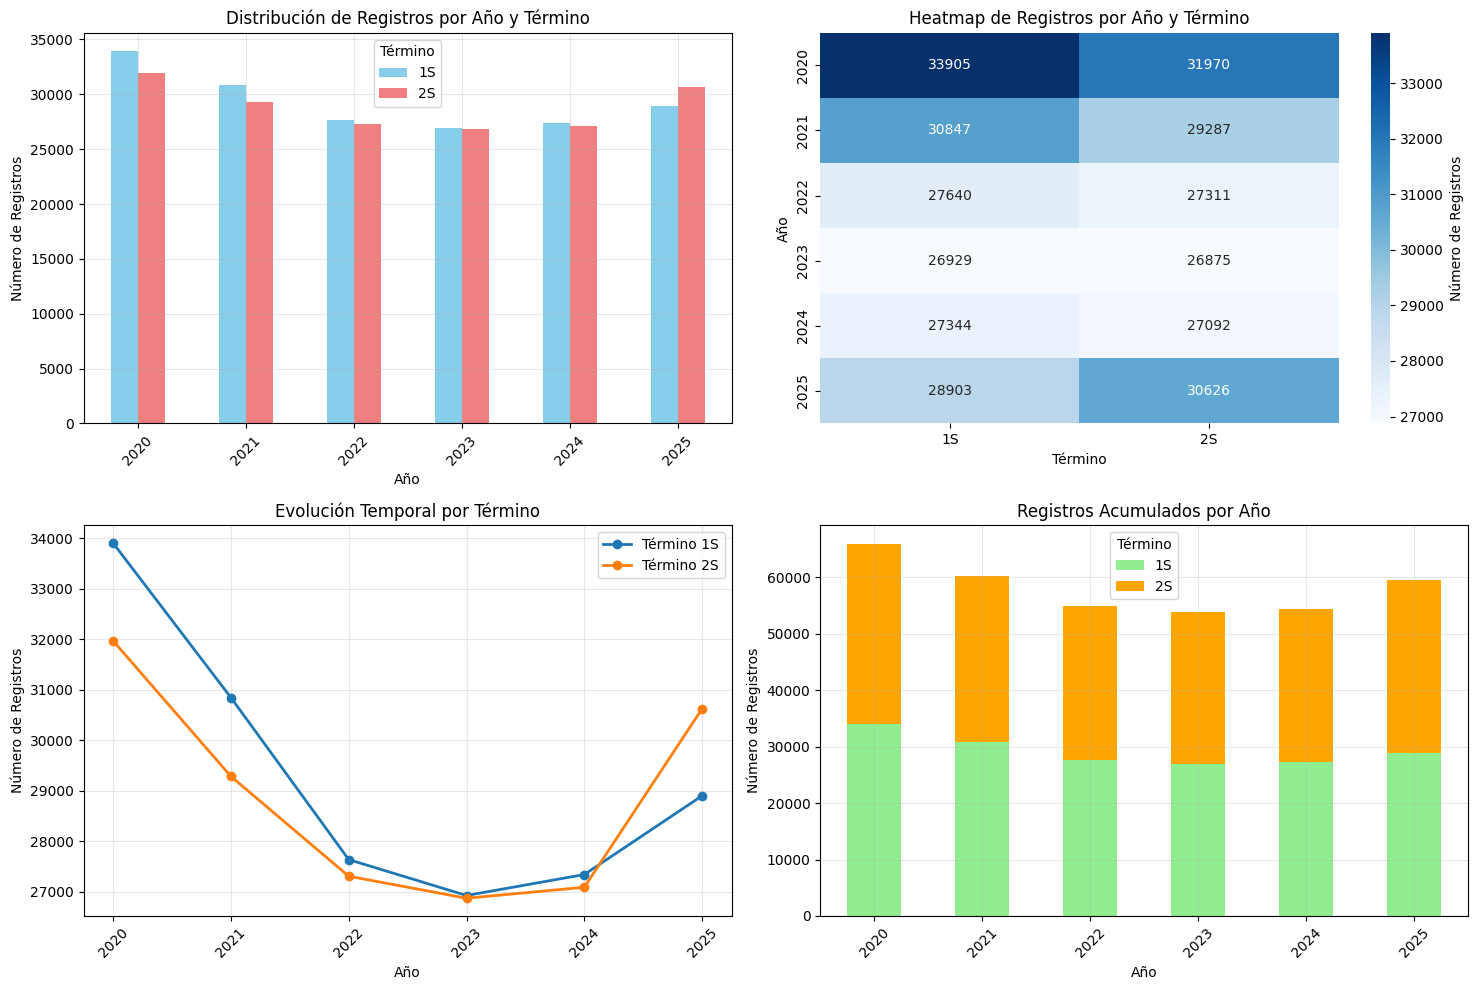


📊 ESTADÍSTICAS GENERALES:
• Total de registros: 348,729
• Años cubiertos: 6
• Términos por año: 2
• Promedio de registros por período: 29061
• Período con más registros: 2020 - 1S (33,905 registros)
• Período con menos registros: 2023 - 2S (26,875 registros)


In [16]:
# Crear el agrupamiento y obtener los conteos
grouped_data = df_complete.groupby(["anio", "termino"]).size().reset_index(name='count')
print("Datos agrupados por año y término:")
print(grouped_data)

# Crear pivot table para mejor visualización
pivot_data = grouped_data.pivot(index='anio', columns='termino', values='count').fillna(0)
print("\nTabla pivot:")
print(pivot_data)

# Crear visualizaciones
plt.figure(figsize=(15, 10))

# 1. Gráfico de barras agrupadas
plt.subplot(2, 2, 1)
pivot_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Distribución de Registros por Año y Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Número de Registros'})
plt.title('Heatmap de Registros por Año y Término')
plt.ylabel('Año')
plt.xlabel('Término')

# 3. Gráfico de líneas
plt.subplot(2, 2, 3)
for termino in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[termino], marker='o', label=f'Término {termino}', linewidth=2)
plt.title('Evolución Temporal por Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4. Gráfico de barras apiladas
plt.subplot(2, 2, 4)
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightgreen', 'orange'])
plt.title('Registros Acumulados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"• Total de registros: {grouped_data['count'].sum():,}")
print(f"• Años cubiertos: {len(pivot_data.index)}")
print(f"• Términos por año: {len(pivot_data.columns)}")
print(f"• Promedio de registros por período: {grouped_data['count'].mean():.0f}")
print(f"• Período con más registros: {grouped_data.loc[grouped_data['count'].idxmax(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmax(), 'termino']} ({grouped_data['count'].max():,} registros)")
print(f"• Período con menos registros: {grouped_data.loc[grouped_data['count'].idxmin(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmin(), 'termino']} ({grouped_data['count'].min():,} registros)")

In [17]:
df_complete["COD_ESTUDIANTE"].nunique()

19147

##### Materias menos de 10 veces vista

In [18]:
df_complete["COD_MATERIA_ACAD_MO"].value_counts()

COD_MATERIA_ACAD_MO
MATG1045      11593
CCPG1043      11581
INDG1033      10326
FISG1005       8849
IDIG2012       7045
              ...  
LOGT3005         16
ADST3002         16
IDIT3004         16
GEOG1038          7
EDCOM00281        2
Name: count, Length: 689, dtype: int64

In [19]:
df_count_materia = df_complete["COD_MATERIA_ACAD_MO"].value_counts()
res_grades = df_count_materia[df_count_materia < 15]
res_grades.shape

(2,)

In [20]:
filter_name_materias = df_complete[df_complete["COD_MATERIA_ACAD_MO"].isin(res_grades.keys().to_list())]
filter_name_materias["MATERIA"].value_counts()

MATERIA
LEGISLACIÓN Y MITIGACIÓN AMBIENTAL    7
GESTIÓN Y CONTROL DE PROYECTOS        2
Name: count, dtype: int64

In [21]:
filter_name_materias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].count()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_24616\3431018063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filter_name_materias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].count()


anio  termino
2020  1S         2
      2S         0
2023  1S         0
      2S         3
2024  1S         0
      2S         4
Name: COD_ESTUDIANTE, dtype: int64

In [22]:
filter_name_materias[filter_name_materias["MATERIA"] == "GESTIÓN Y CONTROL DE PROYECTOS"].head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",16.0,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S
12514,200909331,EDCOM00281,AP,1,77,84,"8,05","7,38",53.0,35.0,58.0,"6,16",37.0,"7,03",19.0,N,"3,91","5,16",NaN,0,0,0,1,2,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S


##### Estudiantes que aparecen solo una vez

In [23]:
df_count_estudiante = df_complete["COD_ESTUDIANTE"].value_counts()
res_student = df_count_estudiante[df_count_estudiante < 2]
res_student.shape

(575,)

In [24]:
res_student.head()

COD_ESTUDIANTE
202509501    1
202315974    1
202590147    1
202590154    1
202590170    1
Name: count, dtype: int64

In [25]:
filter_students = df_complete[df_complete["COD_ESTUDIANTE"].isin(res_student.keys().to_list())]
filter_students.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino
75,201305603,ACUG1043,AP,1,88,79,"8,33","7,55",65.0,62.0,70.0,"7,36",57.0,"7,78",14.0,N,"4,39","4,38",NaN,1,0,0,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,1S
91,201502674,ACUG1043,AP,1,88,75,"8,10","7,55",55.0,66.0,80.0,"8,24",54.0,"8,29",12.0,N,"5,30",NaN,NaN,1,0,0,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,1S
96,201312175,ACUG1045,AP,1,90,84,"8,61","7,97",76.0,60.0,66.0,"6,97",63.0,"7,59",14.0,S,"3,96","2,90","5,03",1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S
100,201502694,ACUG1045,AP,1,99,86,"9,05","7,97",53.0,68.0,76.0,"7,96",52.0,"8,01",11.0,N,"5,40",NaN,NaN,1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S
104,201507679,ACUG1045,AP,1,98,85,"8,95","7,97",51.0,69.0,76.0,"8,05",50.0,"8,10",10.0,N,"5,45",NaN,NaN,1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S


In [26]:
filter_students.groupby(["anio", "ESTADO_MAT_TOMADA_MO"])["COD_ESTUDIANTE"].count()

anio  ESTADO_MAT_TOMADA_MO
2020  AP                      384
      RP                       22
2021  AP                       14
      RP                        6
2022  AP                       14
      PF                        2
      RP                       15
2023  AP                       13
      PF                        6
      RP                        9
2024  AP                       20
      PF                        1
      RP                       14
2025  AC                       34
      AP                        9
      RP                       12
Name: COD_ESTUDIANTE, dtype: int64

In [27]:
filter_students["ESTADO_MAT_TOMADA_MO"].value_counts()

ESTADO_MAT_TOMADA_MO
AP    454
RP     78
AC     34
PF      9
Name: count, dtype: int64

In [28]:
filter_students["MATERIA"].value_counts()

MATERIA
DISEÑO DE PLANTAS                                   53
SISTEMAS DE INFORMACIÓN                             24
DISEÑO DE PLANTAS ALIMENTARIAS                      17
PLANIFICACIÓN DE SISTEMAS DE POTENCIA               16
MANTENIMIENTO INDUSTRIAL                            16
                                                    ..
EXPLOTACIÓN SUBTERRÁNEA                              1
LABORATORIO DE ARQUEOLOGÍA I                         1
METODOLOGÍA DE LA INVESTIGACIÓN EN COMPUTACIÓN       1
ANÁLISIS FINANCIERO                                  1
GESTIÓN Y MARCO REGULATORIO DEL SECTOR ELÉCTRICO     1
Name: count, Length: 152, dtype: int64

In [29]:
print("="*80)
print("ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO")
print("="*80)

# 1. Estudiantes únicos por año
estudiantes_por_anio = df_complete.groupby('anio')['COD_ESTUDIANTE'].nunique().reset_index()
estudiantes_por_anio.columns = ['anio', 'estudiantes_unicos']
print("\n📊 Estudiantes únicos por año:")
print(estudiantes_por_anio)

# 2. Análisis de estados académicos por estudiante
estados_por_estudiante = df_complete.groupby(['COD_ESTUDIANTE', 'ESTADO_MAT_TOMADA_MO']).size().unstack(fill_value=0)

# Verificar qué columnas de estado existen
print(f"\nEstados académicos disponibles: {estados_por_estudiante.columns.tolist()}")

# Calcular totales por estudiante
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    estados_por_estudiante['Total_RP'] = estados_por_estudiante['RP']
    estados_por_estudiante['Total_AP'] = estados_por_estudiante['AP']
    
    # Top estudiantes con más reprobadas
    top_rp = estados_por_estudiante.nlargest(10, 'Total_RP')[['Total_RP', 'Total_AP']]
    print(f"\n⚠️ Top 10 estudiantes con más materias REPROBADAS:")
    for i, (cod_est, row) in enumerate(top_rp.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_RP']} RP, {row['Total_AP']} AP")
    
    # Top estudiantes con más aprobadas
    top_ap = estados_por_estudiante.nlargest(10, 'Total_AP')[['Total_RP', 'Total_AP']]
    print(f"\n✅ Top 10 estudiantes con más materias APROBADAS:")
    for i, (cod_est, row) in enumerate(top_ap.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_AP']} AP, {row['Total_RP']} RP")

# Crear visualizaciones
plt.figure(figsize=(18, 12))

# Gráfico 1: Estudiantes únicos por año
plt.subplot(2, 3, 1)
plt.bar(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
        color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Estudiantes Únicos Inscritos por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes Únicos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Agregar valores encima de las barras
for i, v in enumerate(estudiantes_por_anio['estudiantes_unicos']):
    plt.text(i, v + max(estudiantes_por_anio['estudiantes_unicos'])*0.01, 
             f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Top estudiantes con más RP
if 'RP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 2)
    top_rp_plot = estados_por_estudiante.nlargest(15, 'Total_RP')
    estudiantes_labels = [f'Est_{i+1}' for i in range(len(top_rp_plot))]
    
    plt.bar(range(len(top_rp_plot)), top_rp_plot['Total_RP'], 
            color='red', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Reprobadas (RP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Reprobadas')
    plt.xticks(range(len(top_rp_plot)), estudiantes_labels, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_rp_plot['Total_RP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Top estudiantes con más AP
if 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 3)
    top_ap_plot = estados_por_estudiante.nlargest(15, 'Total_AP')
    estudiantes_labels_ap = [f'Est_{i+1}' for i in range(len(top_ap_plot))]
    
    plt.bar(range(len(top_ap_plot)), top_ap_plot['Total_AP'], 
            color='green', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Aprobadas (AP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Aprobadas')
    plt.xticks(range(len(top_ap_plot)), estudiantes_labels_ap, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_ap_plot['Total_AP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Evolución temporal de estudiantes únicos
plt.subplot(2, 3, 4)
plt.plot(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
         marker='o', linewidth=3, markersize=8, color='purple')
plt.title('Evolución Temporal de\nEstudiantes Únicos', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Estudiantes Únicos')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Gráfico 5: Distribución de estados académicos (histograma)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 5)
    plt.hist([estados_por_estudiante['Total_RP'], estados_por_estudiante['Total_AP']], 
             bins=20, alpha=0.7, label=['Reprobadas (RP)', 'Aprobadas (AP)'], 
             color=['red', 'green'], edgecolor='black')
    plt.title('Distribución de Materias\npor Estudiante', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Materias')
    plt.ylabel('Número de Estudiantes')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Gráfico 6: Relación RP vs AP (scatter plot)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 6)
    plt.scatter(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 
                alpha=0.6, color='orange', edgecolors='black', s=30)
    plt.title('Relación Materias Aprobadas\nvs Reprobadas', fontsize=14, fontweight='bold')
    plt.xlabel('Materias Aprobadas (AP)')
    plt.ylabel('Materias Reprobadas (RP)')
    plt.grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 1)
    p = np.poly1d(z)
    plt.plot(estados_por_estudiante['Total_AP'], p(estados_por_estudiante['Total_AP']), 
             "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📈 ESTADÍSTICAS GENERALES:")
print(f"• Total de estudiantes únicos en el dataset: {df_complete['COD_ESTUDIANTE'].nunique():,}")
print(f"• Año con más estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmax(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].max():,} estudiantes)")
print(f"• Año con menos estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmin(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].min():,} estudiantes)")

if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    print(f"• Promedio de materias reprobadas por estudiante: {estados_por_estudiante['Total_RP'].mean():.2f}")
    print(f"• Promedio de materias aprobadas por estudiante: {estados_por_estudiante['Total_AP'].mean():.2f}")
    print(f"• Estudiante con más reprobadas: {estados_por_estudiante['Total_RP'].max()} materias")
    print(f"• Estudiante con más aprobadas: {estados_por_estudiante['Total_AP'].max()} materias")

ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO

📊 Estudiantes únicos por año:
   anio  estudiantes_unicos
0  2020                9908
1  2021                9183
2  2022                8871
3  2023                8723
4  2024                8517
5  2025                9275

Estados académicos disponibles: ['AC', 'AP', 'PF', 'RP']

⚠️ Top 10 estudiantes con más materias REPROBADAS:
1. Estudiante 202007803: 28 RP, 12 AP
2. Estudiante 201804978: 22 RP, 7 AP
3. Estudiante 201710787: 21 RP, 14 AP
4. Estudiante 201903556: 21 RP, 17 AP
5. Estudiante 201907508: 21 RP, 21 AP
6. Estudiante 201911666: 21 RP, 10 AP
7. Estudiante 201515973: 20 RP, 3 AP
8. Estudiante 201916194: 19 RP, 22 AP
9. Estudiante 201908258: 18 RP, 11 AP
10. Estudiante 202008058: 18 RP, 19 AP

✅ Top 10 estudiantes con más materias APROBADAS:
1. Estudiante 202009411: 48 AP, 2 RP
2. Estudiante 202000303: 45 AP, 1 RP
3. Estudiante 202000824: 45 AP, 3 RP
4. Estudiante 202001921: 45 AP, 0 RP
5. Estudiante 202002374: 45 AP, 1 R

C:\Users\saraujo\AppData\Local\Temp\ipykernel_24616\302040698.py:126: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



📈 ESTADÍSTICAS GENERALES:
• Total de estudiantes únicos en el dataset: 19,147
• Año con más estudiantes nuevos: 2020 (9,908 estudiantes)
• Año con menos estudiantes nuevos: 2024 (8,517 estudiantes)
• Promedio de materias reprobadas por estudiante: 2.08
• Promedio de materias aprobadas por estudiante: 14.49
• Estudiante con más reprobadas: 28 materias
• Estudiante con más aprobadas: 48 materias


##### Mas de una vez visto

In [30]:
df_complete[df_complete["VEZ_TOMADA_MO"] > 1]

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",16.0,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S
35884,201807286,ACUG1036,AP,2,76,66,"6,89","6,74",28.0,61.0,54.0,"6,31",21.0,"7,43",6.0,N,"2,96",NaN,NaN,0,0,0,0,2,NaN,ACUG1036,ANÁLISIS DE DATOS ACUÍCOLAS,2020,2S
35927,201301569,ACUG1043,RP,2,19,0,"0,66","7,55",70.0,56.0,57.0,"6,25",55.0,"7,24",14.0,N,"2,64",NaN,NaN,0,0,0,1,1,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,2S
35930,201514209,ACUG1043,AP,2,72,80,"7,42","7,55",51.0,64.0,73.0,"7,47",47.0,"7,74",11.0,N,"4,25",NaN,NaN,0,0,1,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,2S
38316,201311665,ADSG1025,AP,2,70,45,"6,42","7,68",44.0,46.0,51.0,"5,57",26.0,"7,04",13.0,S,"3,48","3,09","4,60",0,0,1,0,1,NaN,ADSG1025,"GESTIÓN DE CALIDAD, AMBIENTE Y SEGURIDAD EN LA...",2020,2S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368404,202400339,TURG2035,AC,3,0,0,"0,00","6,02",14.0,62.0,70.0,"6,90",10.0,"7,85",4.0,N,"4,08","5,94",NaN,0,0,0,0,3,"7,73",TURG2035,GEOGRAFÍA TURÍSTICA,2025,2S
368409,202204319,TURG2036,AC,2,0,0,"0,00","6,85",24.0,48.0,40.0,"4,84",10.0,"6,81",8.0,N,"4,03","3,32","1,10",0,0,0,0,2,"6,81",TURG2036,TEORÍA DEL TURISMO,2025,2S
368419,202400289,TURG2036,AC,2,0,0,"0,00","6,85",14.0,60.0,55.0,"5,94",9.0,"7,26",4.0,N,"3,58",NaN,NaN,0,0,0,0,3,"7,15",TURG2036,TEORÍA DEL TURISMO,2025,2S
368433,202401048,TURG2036,AC,2,0,0,"0,00","6,85",14.0,65.0,64.0,"6,98",11.0,"7,41",4.0,N,"5,41",NaN,NaN,0,0,0,1,4,"7,41",TURG2036,TEORÍA DEL TURISMO,2025,2S


#### Los de socioeconomico

In [31]:
# df_socioeconomico = pd.read_csv("data/materias/socioeconomico_16741.csv")
df_socioeconomico = pd.read_csv("data/materias/socioeconomico_17944.csv")

C:\Users\saraujo\AppData\Local\Temp\ipykernel_24616\2968955730.py:2: DtypeWarning: Columns (10,41,42,66,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df_socioeconomico = pd.read_csv("data/materias/socioeconomico_17944.csv")


In [32]:
def id_correct(value):
    if len(value) == 9:
        return "0" + value
    return value

In [33]:
df_socioeconomico.shape

(17944, 131)

In [34]:
df_socioeconomico['CODESTUDIANTE'] = df_socioeconomico['CODESTUDIANTE'].astype(str)
df_socioeconomico['NUMEROIDENTIFICACION'] = df_socioeconomico['NUMEROIDENTIFICACION'].astype(str).str.strip().str.upper()

# Extraer el año de ANIO_TERMINO_INGRESO (formato "2002 1S" -> 2002)
df_socioeconomico['anio_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[0].astype(int)
df_socioeconomico['termino_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[1].astype(str)

In [35]:
df_socioeconomico["NUMEROIDENTIFICACION"] = df_socioeconomico["NUMEROIDENTIFICACION"].apply(id_correct)

In [36]:
df_socioeconomico.head()

,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso
0,1,3057,2023-04-28,NaN,2022-04-22-22.03.56.450305,200004851,ESCOBAR SEGOVIA,KENNY FERNANDO,kescobar@espol.edu.ec,ECUATORIANA,0921620548,2000 1S,4.0,0.7801,N,NaN,NaN,Masculino,masculino,Mestizo,casado,1982-06-17,ECUADOR,GUAYAS,GUAYAQUIL,95792616; 95792616,2651491,kescobarsegovia@gmail.com,ACADEMIA NAVAL GUAYAQUIL GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2000.0,0.0,MATUTINA (07:00-14:00 APROX.),Ninguna,SI,INGLÉS,Aprendizaje del colegio,3,No se acostumbra en mi hogar servir comida tre...,Compro en bares de ESPOL,NaN,5,16 a 30 minutos,0,2,0,NaN,0,0,0,NaN,0,0,2,0,NaN,0,0,0,NaN,0,INTERMEDIO,SI,SI,NaN,NO,500,100,250,0,0,50,40,20,500,100,100,Secundaria Completa,Superior Universitaria incompleta,Separados[Unión de Hecho],NO,NaN,SI,Otro:No tiene enfermedad;Madre:No tiene enferm...,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,TARQUI,COOP PANCHO JACOME,"0,0",URBANA,SI,NaN,NaN,NaN,NaN,NaN,Casa/Villa,"Propia, totalmente pagada (ha sido totalmente ...",3,2,SI,SI,NO,SI,NO,SI,Zinc /teja /eternit,Cerámica / Baldosa / Vinil,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,CONECTADO A RED DE ALCANTARILLADO,CARRO RECOLECTAOR,EP. CON MEDIDOR EXCLUSIVO DE VIVIENDA,SI,NaN,NO,NaN,0.0,Bachillerato en Ciencias,DESAYUNO;ALMUERZO;MERIENDA,PORTÁTIL EXCLUSIVA,Plan de datos,WIFI EXCLUSIVO DE LA VIVIENDA,4,2000,1S
1,1,4056,2020-10-28,NaN,2020-10-13-18.27.10.390099,200217933,RECALDE GARAY,MARIA TERESA,trecalde@espol.edu.ec,ECUATORIANA,0912190238,2002 1S,4.0,0.8047,N,NaN,0.0,Femenino,femenino,Blanco,soltero,1983-11-17,ECUADOR,GUAYAS,GUAYAQUIL,97214060,2001847; 2354217,teresa.recaldeg@gmail.com,CRUZ DEL SUR GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2002.0,0.0,MATUTINA (07:00-14:00 APROX.),Por situación socioeconómica,SI,INGLÉS,Aprendizaje del colegio,3,NaN,Salgo de ESPOL y voy a comer a casa,NaN,0,15 minutos o menos,0,0,0,NaN,2,0,0,NaN,-1,0,0,0,NaN,0,0,0,N

In [37]:
df_socioeconomico["CODESTUDIANTE"].nunique()

17854

In [38]:
df_complete["COD_ESTUDIANTE"].nunique()

19147

In [39]:
df_socioeconomico["ANIO_TERMINO_INGRESO"].value_counts()

ANIO_TERMINO_INGRESO
2025 2S    1167
2025 1S    1159
2019 1S    1083
2023 1S     950
2024 1S     935
           ... 
2007 3S       1
2000 2S       1
1992 1S       1
1998 3S       1
1999 2S       1
Name: count, Length: 65, dtype: int64

In [40]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

(1167, 133)

In [41]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 1S"].shape

(1159, 133)

In [42]:
# edad de los estidiantes a partir de FECHANACIMIENTO
df_socioeconomico["FECHANACIMIENTO"] = pd.to_datetime(df_socioeconomico["FECHANACIMIENTO"], errors='coerce', format="%Y-%m-%d")
# Calcular la edad
today = pd.Timestamp('now')
df_socioeconomico["edad"] = (today.year - df_socioeconomico["FECHANACIMIENTO"].dt.year)


<Axes: xlabel='edad'>

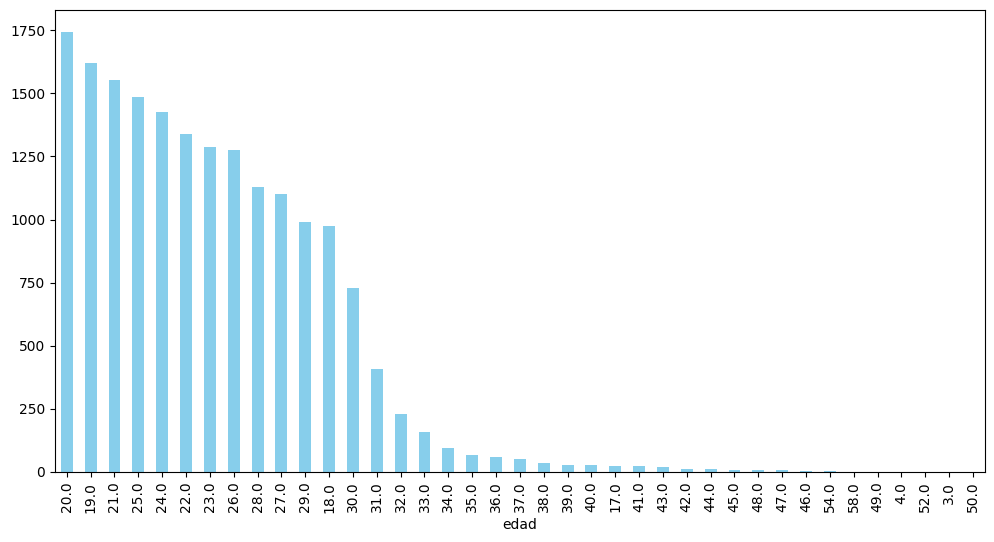

In [43]:
df_socioeconomico["edad"].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [44]:
df_socioeconomico[df_socioeconomico["edad"] < 15]

,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad
12470,3,666942,2025-04-24,2024-12-17,2023-05-08-22.22.01.673102,202301461,BUSTAMANTE VILLAMAR,JOSUE ALEXANDER,josbvill@espol.edu.ec,ECUATORIANA,2300344617,2023 1S,1.0,0.2599,N,NaN,0.0,Masculino,masculino,Mestizo,soltero,2021-12-27,ECUADOR,GUAYAS,GUAYAQUIL,78680042,0959798902,ALEXXVILLAMAR9@GMAIL.COM,UNIDAD EDUCATIVA FISCAL REPLICA SIMON BOLIVAR,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,2022.0,8.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,NaN,NaN,3,NaN,Salgo de ESPOL y voy a comer a casa,NaN,1,61 a 90 minutos,2,0,0,NaN,0,0,0,NaN,0,2,0,0,NaN,0,0,0,NaN,0,BÁSICO,NO,NO,NaN,NO,300,15,60,0,0,15,10,30,0,5,25,Secundaria Completa,Secundaria Completa,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,PASCUALES,Flor de bastion bloque 22 mz 1401 sl 23,"-2.146178,-79.96581",URBANA,SI,NaN,NaN,NaN,NaN,NaN,Casa/Villa,"Propia, totalmente pagada (ha sido totalmente ...",3,1,SI,SI,NO,SI,NO,NO,Zinc /teja /eternit,Cemento / ladrillo,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,CONECTADO A RED DE ALCANTARILLADO,CARRO RECOLECTAOR,EP. CON MEDIDOR EXCLUSIVO DE VIVIENDA,NO,NaN,NO,NaN,0.0,Bachiller Técnico,DESAYUNO;ALMUERZO;MERIENDA,CELULAR;PORTÁTIL COMPARTIDA,WIFI,WIFI EXCLUSIVO DE LA VIVIENDA,5,2023,1S,4.0
12905,3,668575,2025-09-12,2025-08-04,2023-05-09-00.03.27.997502,202307344,ALMAO MALVACIAS,DANIEL ALEJANDRO,dalmao@espol.edu.ec,ECUATORIANA,0962947800,2023 1S,2.0,0.5691,N,NaN,0.0,Masculino,masculino,Mestizo,soltero,2022-12-07,ECUADOR,GUAYAS,GUAYAQUIL,89009596,8900959,orpleinadvr@gmail.com,UNIDAD EDUCATIVA EMANUEL 320,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2023.0,10.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,NaN,NaN,3,NaN,Traigo comida de casa,NaN,2,61 a 90 minutos,2,0,0,NaN,0,0,0,NaN,0,2,0,0,NaN,0,0,0,NaN,0,BÁSICO,NO,NaN,Cuenta de ahorro,NO,400,80,80,350,0,20,50,30,0,0,0,Superior Universitaria completa,"Post-grado (maestría, doctorado, post-do

In [45]:
df_socioeconomico[df_socioeconomico["edad"] > 45].shape

(21, 134)

In [46]:
df_merge = pd.merge(df_complete, df_socioeconomico, left_on="COD_ESTUDIANTE", right_on="CODESTUDIANTE", how="inner")

In [47]:
df_merge.shape

(336306, 163)

In [48]:
df_merge.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",17.0,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,1,642436,2019-09-19,NaN,2019-05-24-00.17.24.209662,201160178,RAMIREZ LARREATEGUI,FRANKLIN ANTONIO,franrami@espol.edu.ec,ECUATORIANA,0925230518,2011 2S,2.0,0.5050,N,no definida,0.0,Masculino,masculino,Mestizo,casado,1993-02-16,ECUADOR,GUAYAS,GUAYAQUIL,78697767; 96512912,2555950/0,frank.ram1602@gmail.com,LICEO CRISTIANO VESPERTINO GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2010.0,0.0,VESPERTINA (12:00-18:00 APROX.),Excelencia académica,SI,INGLÉS,Cursos en academias locales,3,NaN,Compro comida a compañeros que traen para venta,NaN,2,61 a 90 minutos,1,0,0,NaN,0,0,-1,NaN,-1,0,0,1,NaN,0,0,-1,NaN,-1,NaN,SI,NaN,NaN,NO,300,60,86,0,0,15,20,20,180,0,30,Superior Universitaria completa,Superior no Universitaria (tecnología o técnic...,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,PASCUALES,Av. 37 N-O,NaN,URBANA,SI,NaN,NaN,NaN,NaN,NaN,NaN,"Propia, totalmente pagada (ha sido totalmente ...",2,1,SI,NO,NO,SI,NO,NO,Zinc /teja /eternit,Cemento / ladrillo,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,3,2011,2S,32.0
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,1,646239,2019-09-19,NaN,2019-05-06-15.32.29.233282,201310353,OC

#### Filtro por anio_ingreso que se mas del 2006 para no tener estudiantes super resagados

In [49]:
df_merge_less_2006 = df_merge[df_merge["anio_ingreso"] < 2006].copy()
df_merge = df_merge[df_merge["anio_ingreso"] >= 2006].copy()

In [50]:
df_merge_less_2006["anio_ingreso"].value_counts()

anio_ingreso
2005    153
2004    136
2001    110
1997     77
2003     68
1999     66
2002     65
1998     34
1990     18
1992     17
1996     11
2000      1
Name: count, dtype: int64

In [51]:
df_merge_less_2006.groupby(["COD_ESTUDIANTE", "anio_ingreso"])["anio"].count().to_dict()

{('199002130', 1990): 18,
 ('199201526', 1992): 17,
 ('199609991', 1996): 8,
 ('199613423', 1996): 3,
 ('199708579', 1997): 9,
 ('199715764', 1997): 29,
 ('199721002', 1997): 1,
 ('199722414', 1997): 38,
 ('199801101', 1998): 3,
 ('199802182', 1998): 2,
 ('199802505', 1998): 5,
 ('199813346', 1998): 7,
 ('199816687', 1998): 10,
 ('199819889', 1998): 7,
 ('199903519', 1999): 34,
 ('199907403', 1999): 6,
 ('199912007', 1999): 15,
 ('199912585', 1999): 4,
 ('199913872', 1999): 5,
 ('199922303', 1999): 2,
 ('200004851', 2000): 1,
 ('200102978', 2001): 26,
 ('200103802', 2001): 2,
 ('200106037', 2001): 2,
 ('200107944', 2001): 9,
 ('200107985', 2001): 1,
 ('200116564', 2001): 5,
 ('200118792', 2001): 31,
 ('200119139', 2001): 5,
 ('200123669', 2001): 16,
 ('200123768', 2001): 10,
 ('200124667', 2001): 2,
 ('200125193', 2001): 1,
 ('200201184', 2002): 9,
 ('200203958', 2002): 1,
 ('200204162', 2002): 2,
 ('200209286', 2002): 1,
 ('200209435', 2002): 3,
 ('200209476', 2002): 1,
 ('200209617',

In [52]:
df_merge["CODESTUDIANTE"].isna().sum()

np.int64(0)

In [53]:
df_merge[df_merge["CODESTUDIANTE"].isna()]["COD_ESTUDIANTE"].nunique()

0

In [54]:
df_merge[~(df_merge["COD_ESTUDIANTE"].isin(df_socioeconomico["CODESTUDIANTE"]))].shape # si es cero todos estan

(0, 163)

#### Los de GPA

In [55]:
list_gpa_gemeral = glob.glob("data/materias/gpa_*S.csv")

In [56]:
df_gpa_general = pd.DataFrame()
for file_gpa_gen in list_gpa_gemeral:
    print(file_gpa_gen)
    df_tmp = pd.read_csv(file_gpa_gen)
    df_gpa_general = pd.concat([df_gpa_general, df_tmp], ignore_index=True)

data/materias\gpa_general_2020_0S.csv
data/materias\gpa_general_2020_1S.csv
data/materias\gpa_general_2020_2S.csv
data/materias\gpa_general_2021_1S.csv
data/materias\gpa_general_2021_2S.csv
data/materias\gpa_general_2022_1S.csv
data/materias\gpa_general_2022_2S.csv
data/materias\gpa_general_2023_1S.csv
data/materias\gpa_general_2023_2S.csv
data/materias\gpa_general_2024_1S.csv
data/materias\gpa_general_2024_2S.csv
data/materias\gpa_general_2025_1S.csv


In [57]:
df_gpa_general.shape

(92273, 5)

In [58]:
# ANIO to anio_gpa
df_gpa_general.rename(columns={"ANIO": "anio_gpa", "TERMINO": "termino_gpa"}, inplace=True)
df_gpa_general["COD_ESTUDIANTE"] = df_gpa_general["COD_ESTUDIANTE"].astype(str)

In [59]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR
0,200818094,2020,2S,4.0,32.4
1,200110245,2020,2S,6.0,36.6
2,202010070,2020,2S,6.0,46.5
3,202010120,2020,2S,6.0,40.5
4,202010625,2020,2S,6.0,39.0


In [60]:
df_gpa_general["COD_ESTUDIANTE"].nunique(), df_gpa_general.shape

(16931, (92273, 5))

In [61]:
df_gpa_general.groupby(["anio_gpa", "termino_gpa"])["termino_gpa"].value_counts()

anio_gpa  termino_gpa
2020      1S              8501
          2S             17767
2021      1S              8064
          2S              7745
2022      1S              7508
          2S              7128
2023      1S              7147
          2S              7099
2024      1S              7042
          2S              7165
2025      1S              7107
Name: count, dtype: int64

In [62]:
df_gpa_general["GPA"] = round(df_gpa_general["NUMERADOR"]/df_gpa_general["DENOMINADOR"], 2)

In [63]:
df_gpa_general[df_gpa_general["GPA"].isna()].head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
17375,201902194,2020,1S,NaN,NaN,NaN
17376,201916921,2020,1S,NaN,NaN,NaN
26258,201713310,2020,2S,NaN,NaN,NaN
26259,202000097,2020,2S,NaN,NaN,NaN
26260,202002200,2020,2S,NaN,NaN,NaN


In [64]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
0,200818094,2020,2S,4.0,32.4,8.10
1,200110245,2020,2S,6.0,36.6,6.10
2,202010070,2020,2S,6.0,46.5,7.75
3,202010120,2020,2S,6.0,40.5,6.75
4,202010625,2020,2S,6.0,39.0,6.50


In [65]:
df_gpa_general[df_gpa_general["COD_ESTUDIANTE"] == "202504635"]

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA


In [66]:
# df_merge_gpa = pd.merge(df_merge, df_gpa_general[["COD_ESTUDIANTE", "GPA"]], left_on="COD_ESTUDIANTE", right_on="COD_ESTUDIANTE", how="left")
df_merge_gpa = pd.merge(df_merge, 
                       df_gpa_general[["COD_ESTUDIANTE", "anio_gpa", "termino_gpa", "GPA"]], 
                       left_on=["COD_ESTUDIANTE", "anio", "termino"], 
                       right_on=["COD_ESTUDIANTE", "anio_gpa", "termino_gpa"], 
                       how="left")

In [67]:
# # Fill NaN values with a default value before converting to int64
# df_merge_gpa["anio_gpa"] = df_merge_gpa["anio_gpa"].fillna(0).astype(np.int64)

In [68]:
df_merge_gpa.shape, df_merge.shape, df_merge.shape[0] == df_merge_gpa.shape[0], df_gpa_general.shape

((362927, 166), (335550, 163), False, (92273, 6))

In [69]:
"""df_merge_gpa[df_merge_gpa["GPA"].isna()].shape""", df_merge_gpa["GPA"].isna().sum(), "Estudiantes unicos sin GPA:", df_merge_gpa[df_merge_gpa["GPA"].isna()]["COD_ESTUDIANTE"].nunique()

('df_merge_gpa[df_merge_gpa["GPA"].isna()].shape',
 np.int64(66510),
 'Estudiantes unicos sin GPA:',
 10386)

In [70]:
list_columns =["COD_ESTUDIANTE", "CODESTUDIANTE", "COD_MATERIA_ACAD_MO", "CODIGOMATERIA", "anio_ingreso", "termino_ingreso", "anio", "termino", "anio_gpa", "termino_gpa", "GPA", "TERMINOS_REGISTRADOS"] 

In [71]:
df_merge_gpa[list_columns].tail()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
362922,202300422,202300422,TURG2037,TURG2037,2023,1S,2025,2S,NaN,NaN,NaN,6.0
362923,202103719,202103719,TURG2037,TURG2037,2021,1S,2025,2S,NaN,NaN,NaN,10.0
362924,202104683,202104683,TURG2037,TURG2037,2021,1S,2025,2S,NaN,NaN,NaN,10.0
362925,202111548,202111548,TURG2037,TURG2037,2021,2S,2025,2S,NaN,NaN,NaN,9.0
362926,202203030,202203030,TURG2037,TURG2037,2022,1S,2025,2S,NaN,NaN,NaN,8.0


##### Estudiantes del semestre 2025 2s

In [72]:
df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

(4526, 166)

In [73]:
"Estudiantes:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"]["COD_ESTUDIANTE"].nunique(), "Cuantas materias:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

('Estudiantes:', 1167, 'Cuantas materias:', (4526, 166))

##### Filtros de GPA si y no

In [74]:
# df_si_gpa = df_merge_gpa[df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]] # donde si deberia haber gpa
# df_no_gpa = df_merge_gpa[df_merge_gpa["anio"] != df_merge_gpa["anio_gpa"]] # donde no deberia haber gpa
df_si_gpa = df_merge_gpa[~df_merge_gpa["GPA"].isna()]
df_no_gpa = df_merge_gpa[df_merge_gpa["GPA"].isna()]

In [75]:
df_no_gpa[((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S"))].shape, df_si_gpa[((df_si_gpa["anio"] == 2025) & (df_si_gpa["termino"] == "2S"))].shape#[list_columns]

((30359, 166), (0, 166))

In [76]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362927, 296417, 66510, 'Coinciden con el numero total:', True)

In [77]:
df_no_gpa[list_columns].head(5)

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0


##### df_si_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_INGRESO' y de igual manera con el termino
Estudiantes que convalidaron materia un semestre antes de ingresar, pero se le cambiara al pre

In [78]:
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].head()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1232,202004784,202004784,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,8.65,1.0
1407,202004784,202004784,ARQG2042,ARQG2042,2020,1S,2020,1S,2020.0,1S,8.65,1.0
14653,202004784,202004784,HISG2002,HISG2002,2020,1S,2020,1S,2020.0,1S,8.65,1.0
17485,202004784,202004784,INDG1033,INDG1033,2020,1S,2020,1S,2020.0,1S,8.65,1.0
22592,202004784,202004784,MATG2007,MATG2007,2020,1S,2020,1S,2020.0,1S,8.65,1.0


In [79]:
filas_si_gpa_mismo_anio_y_termino.shape, df_si_gpa.shape

((1136, 166), (296417, 166))

In [80]:
filas_si_gpa_mismo_anio_y_termino["anio"].value_counts()

anio
2020    1113
2021      18
2022       5
Name: count, dtype: int64

In [81]:
filas_si_gpa_mismo_anio_y_termino["COD_ESTUDIANTE"].nunique()

142

In [82]:
filas_si_gpa_mismo_anio_y_termino[filas_si_gpa_mismo_anio_y_termino["CODIGOMATERIA"] == "ECOG2067"][["CODIGOMATERIA", "MATERIA"]].iloc[:1, :]

,CODIGOMATERIA,MATERIA
47102,ECOG2067,INTRODUCCIÓN A LA ECONOMÍA


In [83]:
df_merge_gpa[(df_merge_gpa["COD_ESTUDIANTE"] == "202318069") & (~df_merge_gpa["anio_gpa"].isna())][list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
316779,202318069,202318069,FISG1005,FISG1005,2023,2S,2025,1S,2025.0,1S,NaN,1.0
318128,202318069,202318069,IDIG1006,IDIG1006,2023,2S,2025,1S,2025.0,1S,NaN,1.0
321107,202318069,202318069,INDG1033,INDG1033,2023,2S,2025,1S,2025.0,1S,NaN,1.0
323232,202318069,202318069,MATG1045,MATG1045,2023,2S,2025,1S,2025.0,1S,NaN,1.0


In [84]:
# Create a mask for the condition
mask = (df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])

# Use loc to properly modify the DataFrame with the mask
df_si_gpa.loc[mask, 'GPA'] = None
df_si_gpa.loc[mask, 'anio_gpa'] = None
df_si_gpa.loc[mask, 'termino_gpa'] = None

# Display the modified rows
df_si_gpa.loc[mask, list_columns].shape

(1136, 12)

In [85]:
# Create a mask for matching conditions
mask2 = (df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]) & (df_merge_gpa['anio'] == df_merge_gpa['anio_ingreso']) & (df_merge_gpa['termino'] == df_merge_gpa['termino_ingreso'])

# Set GPA to None for these rows
df_merge_gpa.loc[mask2, 'GPA'] = None
df_merge_gpa.loc[mask2, 'anio_gpa'] = None
df_merge_gpa.loc[mask2, 'termino_gpa'] = None

# Show the shape of the filtered DataFrame
df_merge_gpa.loc[mask2, list_columns].shape

(1142, 12)

##### De nuevo Filtro de GPA si y no con GPA y Buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
ya que se descartaron los convalidados de antes de ingresar a primer termino, se agregará solo lo del pre

In [86]:
df_si_gpa = df_merge_gpa[~df_merge_gpa["GPA"].isna()] # donde si deberia haber gpa
df_no_gpa = df_merge_gpa[df_merge_gpa["GPA"].isna()] # donde no deberia haber gpa

In [87]:
df_no_gpa[((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S"))].shape, df_si_gpa[((df_si_gpa["anio"] == 2025) & (df_si_gpa["termino"] == "2S"))].shape#[list_columns]

((30359, 166), (0, 166))

In [88]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362927, 295281, 67646, 'Coinciden con el numero total:', True)

In [89]:
# Ya no deberia haber filas con mismo anio y termino que anio y termino de ingreso con GPA
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].shape[0], "deberia ser 0 ya que en la subseccion anterior se descartan ya que pueden convalidar previamente materias"

(0,
 'deberia ser 0 ya que en la subseccion anterior se descartan ya que pueden convalidar previamente materias')

In [90]:
df_si_gpa[df_si_gpa['anio'] == df_si_gpa['anio_ingreso']].shape, df_si_gpa[df_si_gpa['termino'] == df_si_gpa['termino_ingreso']].shape

((19106, 166), (138003, 166))

##### df_no_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino (sin GPA). Tambien que su TERMINOS_REGISTRADOS sea igual a 1 ya que seria su primer semestre en caso haya realizado un savático.
Y EXCLUIR EL AÑO OBJETIVO `2025 2S`

Los que se actualizaran con la info del pre

In [91]:
anio_objetivo = 2025
termino_objetivo = "2S"

In [92]:
# mismo anio y termino con el de ingreso, tambien que sea su primer termino
filas_no_gpa_mismo_anio_y_termino_tmb_1 = df_no_gpa[((df_no_gpa['anio'] == df_no_gpa['anio_ingreso']) & (df_no_gpa['termino'] == df_no_gpa['termino_ingreso'])) | df_no_gpa["TERMINOS_REGISTRADOS"] == 1]
# que no sea parte del objetivo 2025 2S
filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj = filas_no_gpa_mismo_anio_y_termino_tmb_1[~((filas_no_gpa_mismo_anio_y_termino_tmb_1["anio"] == anio_objetivo) & (filas_no_gpa_mismo_anio_y_termino_tmb_1["termino"] == termino_objetivo))]
filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj.shape, df_no_gpa.shape, df_no_gpa.shape[0] - filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj.shape[0]

((37287, 166), (67646, 166), 30359)

In [93]:
print(f"Total de filas en df_no_gpa: {len(df_no_gpa):,}")
print(f"Filas donde anio coincide con año de ingreso: {len(filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj):,}")
print(f"Porcentaje de coincidencia: {len(filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj)/len(df_no_gpa)*100:.3f}%")

Total de filas en df_no_gpa: 67,646
Filas donde anio coincide con año de ingreso: 37,287
Porcentaje de coincidencia: 55.121%


In [94]:
print(f"\nPrimeras 10 filas que coinciden:")
filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj[list_columns].head()


Primeras 10 filas que coinciden:


,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0


In [95]:
print(f"\nAnálisis de años:")
print(f"Años únicos en 'anio': {sorted(filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj['anio'].unique())}")
print(f"Años únicos en 'ANIO_TERMINO_INGRESO': {sorted(filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj['anio_ingreso'].unique())}")


Análisis de años:
Años únicos en 'anio': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Años únicos en 'ANIO_TERMINO_INGRESO': [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


#### Novatos: asignar su valor del pre como GPA

In [96]:
# estudiantes de ingreso segun su año de estudio y de ingreso, igual con termino
lista_estudiantes_ingreso = [str(x).strip().upper() for x in filas_no_gpa_mismo_anio_y_termino_tmb_1_no_obj["NUMEROIDENTIFICACION"].unique()]

In [97]:
def id_correct(value):
    if len(value) == 9:
        return "0" + value
    return value

In [98]:
query_novatos = get_gpa_novatos(lista_estudiantes_ingreso)
query_novatos

"SELECT p.numeroidentificacion, AVG(ca.PROMEDIO) as gpa\n    FROM espol.tbl_persona p\n    INNER JOIN espol.tbl_inscripcion i ON p.idpersona = i.idpersona\n    INNER JOIN ESPOL.TBL_CURSO_PERSONA ca ON i.idpersonaprograma = ca.idpersonaprograma AND ca.idperiodo = i.idperiodo\n    WHERE p.numeroidentificacion IN ('0927437186','0951908326','0953950052','0959143579','1314449271','0952811362','0957019342','0952964344','0953473774','0941933152','0941441933','0955315148','0932634611','0954187514','0926286238','0106140387','0952241289','0706284171','0952481323','0924253172','0952908549','0952383305','0943709907','0958842429','0954769477','0943156679','0954439147','0952490407','0930649066','0106475114','0952043610','0930618368','1316787488','0958500993','0941267247','0958416562','0925642837','0950644674','0931911275','0944067230','2000123337','0932169006','0951237189','1317981221','0924614142','0952938470','0932316458','0927244780','0944210731','0954139887','0925794984','0951852979','0926236837

In [99]:
conn = ibm_db.connect('DATABASE=' + os.getenv('DATABASE_DAGO') + ';HOSTNAME=' + os.getenv('HOSTNAME') + ';PORT=' + os.getenv('PORT') + ';PROTOCOL=TCPIP;UID=' + os.getenv('USERNAME_DB') + ';PWD=' + os.getenv('PASSWORD_DB') + ';', '', '')
# conn = ibm_db.connect(os.getenv('DATABASE'), os.getenv('USERNAME_DB'), os.getenv('PASSWORD_DB')) # os.getenv('HOSTNAME'), os.getenv('PORT')

if conn:
    print("Conexión exitosa")
else:
    print("Error al conectar")

Conexión exitosa


In [100]:
stmt_select  = ibm_db.exec_immediate(conn, query_novatos)

In [101]:
# Fetch all rows
data_list = []
result = ibm_db.fetch_assoc(stmt_select)
while result:
    # print(result)
    data_list.append(result)
    result = ibm_db.fetch_assoc(stmt_select)

In [102]:
# Close the connection
ibm_db.close(conn)

True

In [103]:
# df de la base de datos de admisiones
df_gpa_admisiones = pd.DataFrame(data_list)
df_gpa_admisiones["NUMEROIDENTIFICACION"] = df_gpa_admisiones["NUMEROIDENTIFICACION"].astype(str).str.strip().str.upper()
df_gpa_admisiones["GPA"] = df_gpa_admisiones["GPA"].str.replace(',', '.').astype(float).round(2)

In [104]:
"DE:", len(lista_estudiantes_ingreso), "Se generaron=", df_gpa_admisiones.shape[0], "Hay nulos =", df_gpa_admisiones[df_gpa_admisiones["GPA"].isna()].shape[0]

('DE:', 8775, 'Se generaron=', 8765, 'Hay nulos =', 0)

In [105]:
df_gpa_admisiones[~(df_gpa_admisiones["NUMEROIDENTIFICACION"].isin(lista_estudiantes_ingreso))]
# si esta vacio estan todo los de admisiones en la lista

,NUMEROIDENTIFICACION,GPA


##### Se decarta estudiantes que estan en SAAC(semestres) pero no en DAGO(admisiones)

In [106]:
# valores en lista_estudiantes_ingreso que no esten en df_gpa_admisiones
faltantes_de_estudiante_en_admisiones = [x for x in lista_estudiantes_ingreso if x not in df_gpa_admisiones["NUMEROIDENTIFICACION"].values]
len(faltantes_de_estudiante_en_admisiones), faltantes_de_estudiante_en_admisiones

(10,
 ['0966288979',
  '0922571815',
  '0963687983',
  '0925693582',
  '1206554139',
  '0604271163',
  '0953464294',
  '0705977213',
  '74374263',
  '73062064'])

In [107]:
df_merge_gpa_real_novatos = df_merge_gpa[~df_merge_gpa["NUMEROIDENTIFICACION"].isin(faltantes_de_estudiante_en_admisiones)]
df_merge_gpa_real_novatos.shape, df_merge_gpa.shape, "Se descartaron:", df_merge_gpa.shape[0] - df_merge_gpa_real_novatos.shape[0], "ya que no constan en admisiones"

((362701, 166),
 (362927, 166),
 'Se descartaron:',
 226,
 'ya que no constan en admisiones')

In [108]:
df_gpa_admisiones

,NUMEROIDENTIFICACION,GPA
0,0104853841,5.16
1,0105426662,7.74
2,0105660096,6.60
3,0105663488,6.92
4,0106003825,7.15
...,...,...
8760,3050429152,7.00
8761,3050476666,9.37
8762,3050597867,7.38
8763,3050654346,7.00


In [109]:
# Crear un diccionario de mapeo desde df_gpa_admisiones
gpa_map = df_gpa_admisiones.set_index('NUMEROIDENTIFICACION')['GPA'].to_dict()

# Crear la máscara completa con todas las condiciones
mask = (
    (df_merge_gpa_real_novatos["anio_ingreso"] == df_merge_gpa_real_novatos["anio"]) & 
    (df_merge_gpa_real_novatos["termino_ingreso"] == df_merge_gpa_real_novatos["termino"]) & 
    (df_merge_gpa_real_novatos["anio"] != anio_objetivo) & 
    (df_merge_gpa_real_novatos["termino"] != termino_objetivo) &
    (df_merge_gpa_real_novatos['NUMEROIDENTIFICACION'].isin(gpa_map.keys()))
)

# Actualizar los valores donde la máscara es True
df_merge_gpa_real_novatos.loc[mask, 'GPA'] = df_merge_gpa_real_novatos.loc[mask, 'NUMEROIDENTIFICACION'].map(gpa_map)
df_merge_gpa_real_novatos.loc[mask, 'anio_gpa'] = df_merge_gpa_real_novatos.loc[mask, 'anio_ingreso']
df_merge_gpa_real_novatos.loc[mask, 'termino_gpa'] = df_merge_gpa_real_novatos.loc[mask, 'termino_ingreso']

# Ver las filas modificadas
print(df_merge_gpa_real_novatos.loc[mask, list_columns].shape)

(17371, 12)


In [110]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()]["NUMEROIDENTIFICACION"].nunique() # [list_columns] # ["MATERIA"].unique()

9058

##### De nuevo Filtro de GPA si y no con GPA y Buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
ya que se descartaron los estudiantes que no estan en admisiones pero si en semestre

In [111]:
df_si_gpa = df_merge_gpa_real_novatos[~df_merge_gpa_real_novatos["GPA"].isna()]
df_no_gpa = df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()]

In [112]:
df_merge_gpa_real_novatos.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa_real_novatos.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362701, 312475, 50226, 'Coinciden con el numero total:', True)

In [113]:
df_no_gpa[((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S"))].shape, df_si_gpa[((df_si_gpa["anio"] == 2025) & (df_si_gpa["termino"] == "2S"))].shape#[list_columns]

((30340, 166), (0, 166))

##### Revisión de df_no_gpa
Donde al año y termino coinciden con el de ingreso, deberia ser cero con el procesamiento previo

In [114]:
filas_no_gpa_mismo_anio_y_termino = df_no_gpa[
    (df_no_gpa["anio_ingreso"] == df_no_gpa["anio"]) & 
    (df_no_gpa["termino_ingreso"] == df_no_gpa["termino"]) & 
    (df_no_gpa["anio"] != anio_objetivo) & 
    (df_no_gpa["termino"] != termino_objetivo)
]
filas_no_gpa_mismo_anio_y_termino.shape[0], "deberia ser cero con el procesamiento previo", filas_no_gpa_mismo_anio_y_termino.shape[0] == 0

(0, 'deberia ser cero con el procesamiento previo', True)

De aqui deberia ser cero

In [115]:
df_no_gpa[~(((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S")) | df_no_gpa["TERMINOS_REGISTRADOS"] == 1)].shape

(0, 166)

In [116]:
df_no_gpa[~(((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S")) | df_no_gpa["TERMINOS_REGISTRADOS"] == 1)][list_columns]#["anio_ingreso"].unique()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS


##### Revisión de df_si_gpa

In [160]:
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[((df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso']))]
filas_si_gpa_mismo_anio_y_termino_primer_term = df_si_gpa[((df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])) | (df_si_gpa["TERMINOS_REGISTRADOS"] == 1)]
filas_si_gpa_mismo_anio_y_termino.shape[0], df_si_gpa.shape[0], filas_si_gpa_mismo_anio_y_termino_primer_term.shape[0]

(17371, 312475, 17436)

In [161]:
filas_si_gpa_mismo_anio_y_termino_primer_term[list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.72,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,7.16,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,4.30,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.53,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.97,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293631,202407268,202407268,INDG1033,INDG1033,2024,1S,2024,2S,2024.0,2S,8.52,1.0
295410,202407268,202407268,MATG1045,MATG1045,2024,1S,2024,2S,2024.0,2S,8.52,1.0
297838,202211140,202211140,MATG1056,MATG1056,2022,2S,2024,2S,2024.0,2S,8.42,1.0
297923,202211140,202211140,MATG1062,MATG1062,2022,2S,2024,2S,2024.0,2S,8.42,1.0


In [ ]:
"Deberia ser igual ya que ", df_si_gpa.shape[0] == filas_si_gpa_mismo_anio_y_termino_primer_term.shape[0]

('', True)

#### Revision de todo lo socioeconomico

In [118]:
df_si_gpa["RECIBEAYUDA"].value_counts()

RECIBEAYUDA
NO    279982
SI     20476
Name: count, dtype: int64

In [119]:
df_si_gpa["TIPOVIVIENDASEP"].value_counts()
# TIPO DE COLEGIO, pension, LO DE PADRES, NIVEL DE INGLES, TIENEDISCAPACIDAD, tipo parroquia, buses, estado vivienda, cantidad de cuartos y baños, , gastos el

TIPOVIVIENDASEP
Casa/Villa                          245855
Departamento en casa                 29997
Departamento en edificio             12963
Cuarto(s) en casa de inquilinato      4543
Otro                                  3597
Rancho                                 638
Choza                                  367
Covacha                                128
Name: count, dtype: int64

In [133]:
df_si_gpa[df_si_gpa["TIPOVIVIENDASEP"] == "Choza"].head()
# pension, direccion 

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad,anio_gpa,termino_gpa,GPA
345,201901956,ADSG1025,AP,1,73,80,"8,05","7,68",12.0,63.0,68.0,"7,21",10.0,"7,66",4.0,N,"4,94",NaN,NaN,0,0,1,0,4,NaN,ADSG1025,"GESTIÓN DE CALIDAD, AMBIENTE Y SEGURIDAD EN LA...",2020,1S,3,652283,2023-09-21,2023-08-08,2022-05-02-14.37.07.038446,201901956,CHUQUIMARCA ZURITA,LOREN PAMELA,lorczuri@espol.edu.ec,ECUATORIANA,0926818642,2019 1S,2.0,0.4327,N,NaN,0.0,Femenino,femenino,Mestizo,soltero,2001-02-10,ECUADOR,GUAYAS,GUAYAQUIL,68617330,2027735; 6057123,pame_zurita_2013@hotmail.com,LUIS BONINI PINO,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,2018.0,8.0,VESPERTINA (12:00-18:00 APROX.),Ninguna,SI,INGLÉS,Aprendizaje del colegio;Cursos en academias lo...,3,"Normalmente no tengo mucho apetito, soy de poc...",Salgo de ESPOL y voy a comer a casa,NaN,3,61 a 90 minutos,3,0,0,NaN,0,0,1,15 minutos o menos,1,3,0,0,NaN,0,0,1,15 minutos o menos,1,INTERMEDIO,NO,SI,NaN,SI,190,100,150,1,1,80,80,100,1,1,1,Secundaria Completa,Secundaria Completa,Casados,SI,Padre:No tiene discapacidad;Madre:No tiene dis...,NO,Padre:No tiene enfermedad;Madre:No tiene enfer...,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,NaN,Vergeles MZ.89 B SL. 35,"-2.146178,-79.96581",URBANA,SI,NaN,NaN,NaN,NaN,NaN,Choza,Comprada y se está pagando (incluye la viviend...,3,3,SI,SI,SI,SI,SI,SI,Hormigón/losa/cemento,Cerámica / Baldosa / Vinil,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,CONECTADO A RED DE ALCANTARILLADO,CARRO RECOLECTAOR,EP. CON MEDIDOR EXCLUSIVO DE VIVIENDA,

#### Nuevo

In [121]:
print(f"\nAnálisis de años:")
print(f"Años únicos en 'anio': {sorted(df_no_gpa['anio'].unique())}")
print(f"Años únicos en 'ANIO_TERMINO_INGRESO': {sorted(df_no_gpa['anio_ingreso'].unique())}")


Análisis de años:
Años únicos en 'anio': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Años únicos en 'ANIO_TERMINO_INGRESO': [np.int64(2006), np.int64(2007), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


In [134]:
# Ver casos que NO coinciden
filas_no_gpa_diferente_anio_o_termnino = df_no_gpa[(df_no_gpa['anio'] != df_no_gpa['anio_ingreso']) | (df_no_gpa['termino'] != df_no_gpa['termino_ingreso'])]
filas_no_gpa_diferente_anio_o_termnino.shape, df_no_gpa.shape

((26007, 166), (50226, 166))

In [137]:
df_no_gpa[df_no_gpa["TERMINOS_REGISTRADOS"] == 1][["termino_ingreso", "termino", "TERMINOS_REGISTRADOS"]]

,termino_ingreso,termino,TERMINOS_REGISTRADOS
2926,2S,1S,1.0
3954,2S,1S,1.0
8794,2S,1S,1.0
14795,1S,1S,1.0
17219,2S,1S,1.0
...,...,...,...
361125,2S,2S,1.0
361126,2S,2S,1.0
361127,2S,2S,1.0
361128,2S,2S,1.0


In [123]:
print(f"\nEjemplos de filas que NO coinciden (primeras 10):")
filas_no_gpa_diferente_anio_o_termnino[['anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]].head()


Ejemplos de filas que NO coinciden (primeras 10):


,anio,anio_ingreso,termino,termino_ingreso,GPA
2926,2020,2019,1S,2S,NaN
3954,2020,2019,1S,2S,NaN
8794,2020,2019,1S,2S,NaN
14795,2020,2019,1S,1S,NaN
17219,2020,2019,1S,2S,NaN


In [124]:
# filas_mismo_anio_diferente_termino
filas_no_gpa_diferente_anio_o_termnino[filas_no_gpa_diferente_anio_o_termnino["anio"] == filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"]][['anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]].head()

,anio,anio_ingreso,termino,termino_ingreso,GPA
32609,2020,2020,2S,1S,NaN
32711,2020,2020,2S,1S,NaN
34265,2020,2020,2S,1S,NaN
34435,2020,2020,2S,1S,NaN
36790,2020,2020,2S,1S,NaN


In [125]:
# contar por dos columnas 	anio	anio_ingreso
filas_no_gpa_diferente_anio_o_termnino.groupby(['anio', 'anio_ingreso', "termino", "termino_ingreso"]).size().reset_index(name='count').sort_values(by='count', ascending=False)

,anio,anio_ingreso,termino,termino_ingreso,count
56,2025,2025,2S,1S,4394
54,2025,2024,2S,1S,3361
52,2025,2023,2S,2S,3072
51,2025,2023,2S,1S,2842
48,2025,2022,2S,2S,2798
55,2025,2024,2S,2S,2773
47,2025,2022,2S,1S,1797
45,2025,2021,2S,2S,1210
44,2025,2021,2S,1S,1183
42,2025,2020,2S,1S,636


In [126]:
filas_no_gpa_diferente_anio_o_termnino.groupby(["COD_ESTUDIANTE"])["anio_ingreso"].value_counts()

COD_ESTUDIANTE  anio_ingreso
200506137       2006            1
200533511       2006            1
200619641       2006            4
200626182       2006            6
200720290       2007            4
                               ..
202511663       2025            6
202511671       2025            6
202511689       2025            6
202511697       2025            6
202511705       2025            5
Name: count, Length: 7125, dtype: int64

In [127]:
filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"].value_counts()

anio_ingreso
2024    6157
2023    5976
2022    4622
2025    4394
2021    2405
2020    1017
2019     795
2018     222
2017     138
2016      76
2015      56
2014      53
2013      34
2011      19
2012      18
2006      12
2010       9
2007       4
Name: count, dtype: int64

In [128]:
filas_no_gpa_diferente_anio_o_termnino[((filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"] == 2005))]#[["COD_ESTUDIANTE", 'anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]]

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,CODIGOMATERIA,MATERIA,anio,termino,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad,anio_gpa,termino_gpa,GPA


In [129]:
print("Cantidad de filas que no tienen GPA asignado:", df_no_gpa.shape[0])
print("Cantidad de filas que no tienen GPA asignado y coinciden en año y término de ingreso:", filas_no_gpa_mismo_anio_y_termino.shape[0])
print("Cantidad de filas que no tienen GPA asignado y NO coinciden en año ni término de ingreso:", filas_no_gpa_diferente_anio_o_termnino.shape[0])
print("Verificación:", df_no_gpa.shape[0] == filas_no_gpa_mismo_anio_y_termino.shape[0] + filas_no_gpa_diferente_anio_o_termnino.shape[0])

Cantidad de filas que no tienen GPA asignado: 50226
Cantidad de filas que no tienen GPA asignado y coinciden en año y término de ingreso: 0
Cantidad de filas que no tienen GPA asignado y NO coinciden en año ni término de ingreso: 26007
Verificación: False


In [130]:
# Si quieres trabajar solo con las filas que coinciden:
df_coincidencias = filas_no_gpa_mismo_anio_y_termino.copy()

print(f"\nDataFrame con coincidencias:")
print(f"Forma: {df_coincidencias.shape}")
print(f"Estudiantes únicos: {df_coincidencias['COD_ESTUDIANTE'].nunique()}")

# Distribución por año de las coincidencias
print(f"\nDistribución de coincidencias por año:")
print(df_coincidencias['anio'].value_counts().sort_index())

# Distribución por término de las coincidencias  
print(f"\nDistribución de coincidencias por término:")
print(df_coincidencias['termino'].value_counts())


DataFrame con coincidencias:
Forma: (0, 166)
Estudiantes únicos: 0

Distribución de coincidencias por año:
Series([], Name: count, dtype: int64)

Distribución de coincidencias por término:
Series([], Name: count, dtype: int64)


In [131]:
df_coincidencias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].nunique()

Series([], Name: COD_ESTUDIANTE, dtype: int64)

In [132]:
df_coincidencias[["COD_ESTUDIANTE", "anio", "anio_ingreso", "termino", "termino_ingreso", "anio_gpa", "termino_gpa", "GPA"]].head(10)

,COD_ESTUDIANTE,anio,anio_ingreso,termino,termino_ingreso,anio_gpa,termino_gpa,GPA
